In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

## 1. Summary statistics of all the defects

In [8]:
df = pd.read_csv('defect_3500.csv')
df.describe()

df.loc[:2449].describe()

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR
count,2450.000000,2450.000000,2.450000e+03,2450.000000,2450.000000,2450.000000,2450.000000
mean,1225.500000,0.026113,1.000000e-03,-0.000320,0.030388,1.270854,0.022181
std,707.398403,0.018352,6.484853e-17,0.022207,0.010287,45.282482,0.790328
min,1.000000,0.000019,1.000000e-03,-0.039965,0.010064,-89.977098,-1.570397
25%,613.250000,0.011295,1.000000e-03,-0.019785,0.022394,-31.603092,-0.551578
50%,1225.500000,0.022550,1.000000e-03,-0.000547,0.030307,0.439034,0.007663
75%,1837.750000,0.037277,1.000000e-03,0.018201,0.038533,34.079630,0.594802
max,2450.000000,0.079769,1.000000e-03,0.039946,0.049956,89.887496,1.568833


In [11]:
df.loc[2450:].describe()

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR
count,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000
mean,2975.500000,0.026286,1.000000e-03,-0.000278,0.030139,1.336749,0.023331
std,303.253195,0.018588,4.555819e-18,0.022042,0.010129,45.585897,0.795624
min,2451.000000,0.000008,1.000000e-03,-0.039937,0.010064,-89.962484,-1.570142
25%,2713.250000,0.010588,1.000000e-03,-0.018673,0.022113,-31.528559,-0.550277
50%,2975.500000,0.023033,1.000000e-03,0.000420,0.029838,0.454046,0.007925
75%,3237.750000,0.037498,1.000000e-03,0.017929,0.038384,33.950915,0.592555
max,3500.000000,0.079220,1.000000e-03,0.039946,0.049956,89.403917,1.560393


### 3D MODEL

In [6]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df2 = pd.read_csv('Model_prediction_evaluation/3D_model_prediction_results_final.csv')

df_summary = df2.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary

,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.011468,0.003418,0.068311,0.921102,1.482955
std,0.016320,0.004688,0.004339,0.096223,0.089848
min,0.000027,0.000004,0.061205,0.619470,1.202511
25%,0.000249,0.000095,0.065324,0.848718,1.423687
50%,0.002202,0.000682,0.067107,0.933007,1.482734
75%,0.018101,0.005720,0.070113,1.000000,1.545519
max,0.085815,0.023146,0.091812,1.167578,1.910013


In [10]:
(0.011468/0.011384-1)*100

0.7378777231201727

### 2D MODEL

In [28]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df = pd.read_csv('Model_prediction_evaluation/2D_model_prediction_results_final.csv')

df_summary = df.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary

print(df_summary.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &          MSE &  MSE\_modified &  MSE\_modified\_das &  MSE\_modified\_defect &  MSE\_modified\_defect\_DAS \\
\midrule
count &  1050.000000 &   1050.000000 &       1050.000000 &          1050.000000 &              1050.000000 \\
mean  &     0.011384 &      0.003418 &          0.068311 &             0.916891 &                 1.482955 \\
std   &     0.016591 &      0.004776 &          0.004339 &             0.096650 &                 0.089848 \\
min   &     0.000008 &      0.000001 &          0.061205 &             0.618017 &                 1.202511 \\
25\%   &     0.000069 &      0.000037 &          0.065324 &             0.844623 &                 1.423687 \\
50\%   &     0.000799 &      0.000283 &          0.067107 &             0.933803 &                 1.482734 \\
75\%   &     0.019240 &      0.005967 &          0.070113 &             0.999975 &                 1.545519 \\
max   &     0.149570 &      0.036712 &          0.091812 &            

/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_26434/3281503205.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_summary.to_latex())


In [13]:
df_summary.loc['mean']

MSE                        0.011384
MSE_modified               0.003418
MSE_modified_das           0.068311
MSE_modified_defect        0.916891
MSE_modified_defect_DAS    1.482955
Name: mean, dtype: float64

In [23]:
df_summary.MSE

count    1050.000000
mean        0.011384
std         0.016591
min         0.000008
25%         0.000069
50%         0.000799
75%         0.019240
max         0.149570
Name: MSE, dtype: float64

In [29]:
df[round(df.MSE, 6) == round(df_summary.MSE['25%'], 6)]
# df[round(df.MSE_modified, 6) == round(df_summary.MSE_modified['25%'], 6)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
90,2541.0,0.041287,0.001,-0.000208,0.035605,29.183444,0.509347,01-Feb-2023 12:32:55,0.000069,0.000044,0.071769,0.911180,1.547970
124,2575.0,0.016307,0.001,0.038565,0.032162,84.075353,1.467392,01-Feb-2023 13:11:55,0.000069,0.000044,0.067110,0.716817,1.299905
618,3069.0,0.006750,0.001,0.035328,0.042322,12.421696,0.216800,02-Feb-2023 02:21:22,0.000069,0.000056,0.067130,0.756705,1.467606
632,3083.0,0.003701,0.001,0.024502,0.012622,-38.855388,-0.678154,02-Feb-2023 02:37:48,0.000069,0.000028,0.064093,0.831331,1.433752


In [30]:
df[round(df.MSE, 4) == round(df_summary.MSE['50%'], 4)]
# df[round(df.MSE_modified, 5) == round(df_summary.MSE_modified['50%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
484,2935.0,0.057102,0.001,0.018438,0.032483,-24.856294,-0.433824,01-Feb-2023 21:53:57,0.000788,0.000308,0.069553,0.937003,1.575898
560,3011.0,0.034555,0.001,0.016721,0.028940,-76.386570,-1.333197,02-Feb-2023 00:58:02,0.000811,0.000324,0.065045,0.873231,1.428138
640,3091.0,0.054884,0.001,0.031652,0.034973,-36.315684,-0.633828,02-Feb-2023 02:46:56,0.000778,0.000255,0.069374,0.932338,1.517282


In [32]:
df[round(df.MSE, 5) == round(df_summary.MSE['75%'], 5)]
# df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['75%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
320,2771.0,0.016842,0.001,0.035613,0.030580,-84.785494,-1.479786,01-Feb-2023 17:09:12,0.019240,0.004861,0.066591,1.000000,1.293974
703,3154.0,0.016537,0.001,-0.001847,0.013678,66.521434,1.161018,02-Feb-2023 04:04:22,0.019238,0.005271,0.062845,1.006483,1.393326
988,3439.0,0.024674,0.001,0.029253,0.013097,-22.478128,-0.392317,02-Feb-2023 12:36:34,0.019243,0.006943,0.065625,0.980919,1.456509


In [35]:
df[round(df.MSE, 6) == round(df_summary.MSE['max'], 6)]
# df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['max'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
367,2818.0,0.067721,0.001,-0.003627,0.040243,8.644386,0.150873,01-Feb-2023 19:32:39,0.14957,0.036712,0.071222,1.005255,1.579965


In [36]:
df[round(df.MSE, 6) == round(df_summary.MSE['min'], 6)]
# df[round(df.MSE_modified, 7) == round(df_summary.MSE_modified['min'], 7)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
562,3013.0,0.000228,0.001,-0.010908,0.046566,-72.647593,-1.26794,02-Feb-2023 01:01:45,0.000008,0.000002,0.06576,0.900805,1.736329


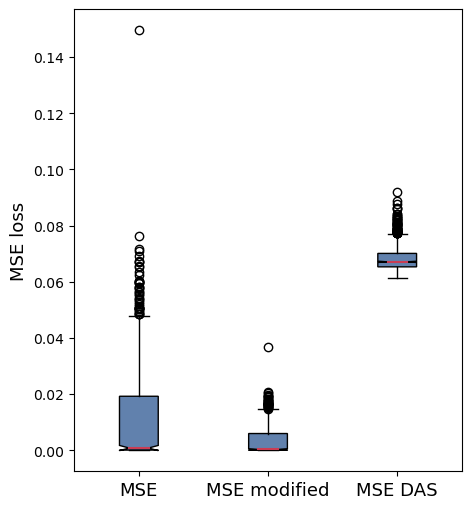

(array([1]), [Text(0, 0, '')])

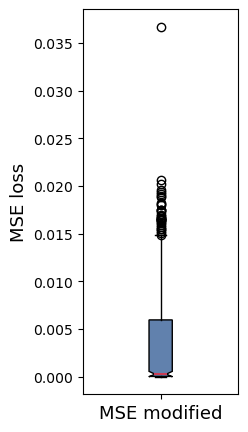

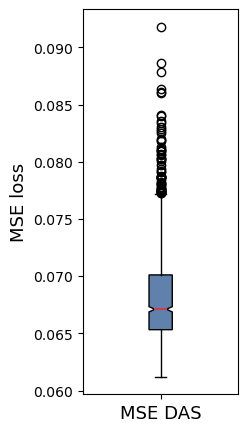

In [37]:
# Zoomed in view about the boxplot of 

# df2 = pd.read_csv('3D_model_prediction_results.csv')


plt.subplots(figsize = (5, 6))
plt.boxplot([df.MSE, df.MSE_modified, df.MSE_modified_das],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE', 'MSE modified', 'MSE DAS'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE modified'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified_das],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE DAS'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)


### Small defect vs large defect

In [38]:
df_small_defect = df[df.defWidth < width_small]
df_s = df_small_defect.describe().loc['mean']

df_large_defect = df[df.defWidth > width_small]
df_l = df_large_defect.describe().loc['mean']

size = ['small', 'large']
fig, ax = plt.subplots(2,3, figsize = [16,8])
ax[0, 0].bar(size, [df_s.MSE, df_l.MSE])
ax[0, 0].set_title('MSE')

for bars in ax[0, 0].containers:
    ax[0, 0].bar_label(bars)

ax[0, 1].bar(size, [df_s.MSE_modified, df_l.MSE_modified])
ax[0, 1].set_title('MSE_modified')

for bars in ax[0, 1].containers:
    ax[0, 1].bar_label(bars)

ax[0, 2].bar(size, [df_s.MSE_modified_das, df_l.MSE_modified_das])
ax[0, 2].set_title('MSE_modified_das')

for bars in ax[0, 2].containers:
    ax[0, 2].bar_label(bars)

ax[1, 0].bar(size, [df_s.MSE_modified_defect, df_l.MSE_modified_defect])
ax[1, 0].set_title('MSE_modified_defect')

for bars in ax[1, 0].containers:
    ax[1, 0].bar_label(bars)

ax[1, 1].bar(size, [df_s.MSE_modified_defect_DAS , df_l.MSE_modified_defect_DAS ])
ax[1, 1].set_title('MSE_modified_defect_DAS ')

for bars in ax[1, 1].containers:
    ax[1, 1].bar_label(bars)

NameError: name 'width_small' is not defined

### Identify the low loss characteristic

In [126]:
df = pd.read_csv('2D_model_prediction_results.csv')
df['x_over_y'] = df.defPosx / df.defPosy 

In [133]:
threshold = df_summary.MSE_modified.loc['25%']
df_filter = df[df.MSE_modified <= threshold]
df_stats = df_filter.describe()
df_stats.loc['std'] / df_stats.loc['mean'] * 100

index                      6.518682e+00
defWidth                   7.918868e+01
defHeight                  6.517616e-14
defPosx                   -9.829102e+02
defPosy                    3.514369e+01
defAng                    -2.369023e+03
defAngR                   -2.369023e+03
MSE                        4.626559e+01
MSE_modified               4.864549e+01
MSE_modified_das           5.547198e+00
MSE_modified_defect        7.496395e+00
MSE_modified_defect_DAS    5.774160e+00
x_over_y                  -1.073632e+03
dtype: float64

The threshold is 5.2779064390051644e-05
The threshold is 0.00628330931067465


(-90.0, 90.0)

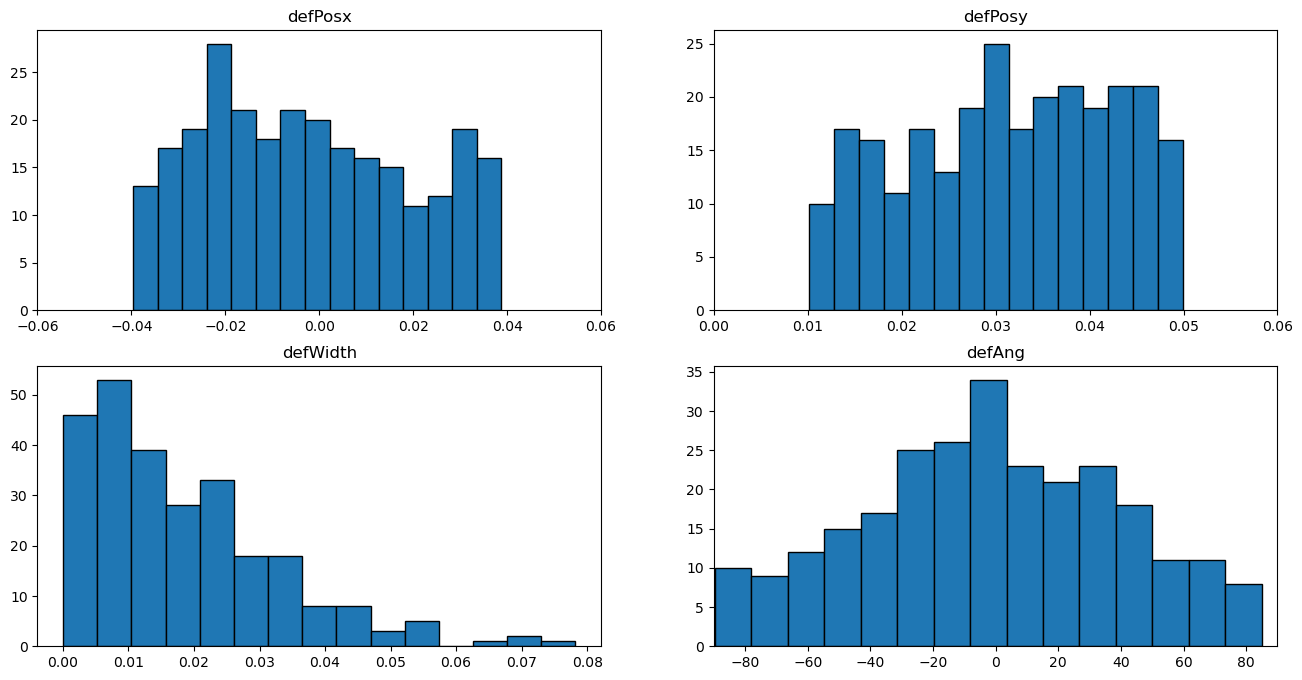

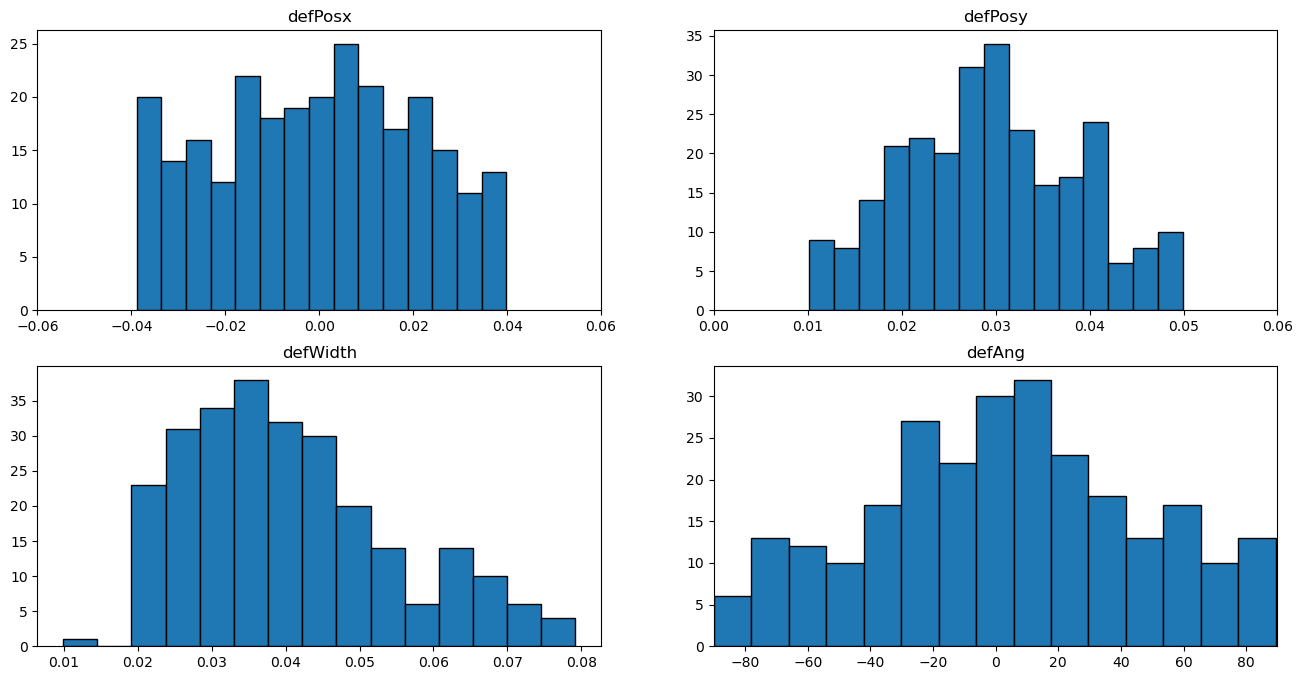

In [122]:

threshold = df_summary.MSE_modified.loc['25%']
bins = 15
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified <= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)

threshold = df_summary.MSE_modified.loc['75%']
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified >= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)


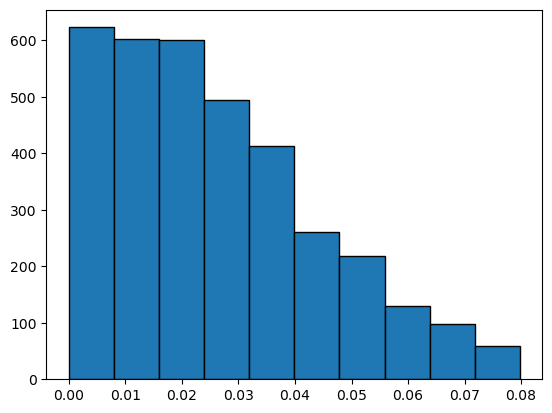

In [28]:
frq, edges = np.histogram(defwidth, 10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x113de0820>,
 'caps': [<matplotlib.lines.Line2D at 0x113de0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113de0550>],
 'medians': [<matplotlib.lines.Line2D at 0x113df03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x113df0670>],
 'means': []}

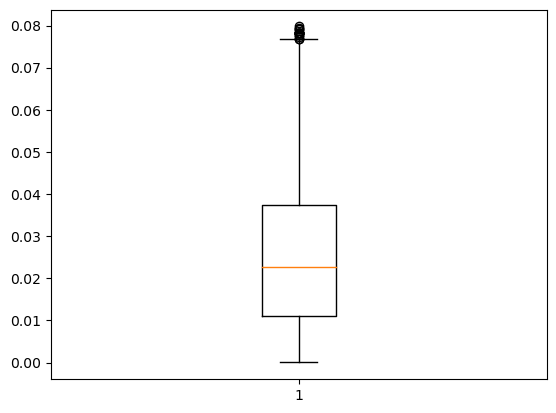

In [29]:
plt.boxplot(defwidth)